In [189]:
import pandas as pd
import io

df = pd.read_csv('Vacant_Building_Rehabs.csv')
df = df.drop(columns=["X", "Y", "OBJECTID", "OBJECTID_1",
             "PermitNum", "Block", "Lot", "VBN", "Council_District", "BLOCKLOT", "Address"])

df = df.dropna()
df

,DateIssue,DateIssued,ExistingUse,ProposedUse,HousingMarketTypology2017,Neighborhood
0,2018/01/03 13:30:02+00,Jan 3 2018 1,1-08,1-08,I,EASTERWOOD
1,2019/11/13 15:00:29+00,Nov 13 2019 3,1-08,1-08,I,EASTERWOOD
2,2020/06/16 07:30:20+00,Jun 16 2020 7,1-08,1-08,I,EASTERWOOD
3,2018/05/03 13:30:01+00,May 3 2018 1,1-08,1-08,I,EASTERWOOD
4,2019/06/20 00:00:00+00,Jun 20 2019 12,MIXC,MIXC,I,EASTERWOOD
...,...,...,...,...,...,...
8180,2019/09/03 15:30:08+00,Sep 3 2019 3,1-05,1-05,E,WEST FOREST PARK
8181,2019/08/02 15:30:08+00,Aug 2 2019 3,1-05,1-05,E,WEST FOREST PARK
8182,2016/06/15 00:00:00+00,Jun 15 2016 12,SF,SF,E,WEST FOREST PARK
8183,2015/01/29 00:00:00+00,Jan 29 2015 12,VAC,SF,E,WEST FOREST PARK


In [52]:

rehab_dates = df.iloc[:, 0]
rehab_dates

0       2018/01/03 13:30:02+00
1       2019/11/13 15:00:29+00
2       2020/06/16 07:30:20+00
3       2018/05/03 13:30:01+00
4       2019/06/20 00:00:00+00
                 ...          
8180    2019/09/03 15:30:08+00
8181    2019/08/02 15:30:08+00
8182    2016/06/15 00:00:00+00
8183    2015/01/29 00:00:00+00
8184    2015/04/06 00:00:00+00
Name: DateIssue, Length: 7025, dtype: object

In [53]:
neighborhoods = df.iloc[:,5]
areas = set(neighborhoods)
areas


{'ABELL                                    ',
 'ALLENDALE                                ',
 'ARCADIA                                  ',
 'ARLINGTON                                ',
 'ASHBURTON                                ',
 'BARCLAY',
 'BARCLAY                                  ',
 'BARRE CIRCLE                             ',
 'BELAIR-EDISON                            ',
 'BELAIR-PARKSIDE                          ',
 'BELVEDERE                                ',
 'BEREA                                    ',
 'BETTER WAVERLY                           ',
 'BEVERLY HILLS                            ',
 'BIDDLE STREET                            ',
 'BOLTON HILL                              ',
 'BOYD-BOOTH                               ',
 'BRIDGEVIEW/GREENLAWN                     ',
 'BROADWAY EAST                            ',
 'BURLEITH-LEIGHTON                        ',
 "BUTCHER'S HILL                           ",
 'CALLAWAY-GARRISON                        ',
 'CAMERON VILLAGE     

Mapping neighborhoods to numerical values so they can be utilized in machine learning model.

In [54]:
areas_dict = {}
num = 1
for area in areas:
    areas_dict[area] = num
    num += 1

areas_dict

{'REMINGTON                                ': 1,
 'FRANKLINTOWN ROAD                        ': 2,
 'COLDSTREAM HOMESTEAD MONTEBELLO          ': 3,
 'ARCADIA                                  ': 4,
 "BUTCHER'S HILL                           ": 5,
 'BOYD-BOOTH                               ': 6,
 'TOWANDA-GRANTLEY                         ': 7,
 'BEREA                                    ': 8,
 'BEVERLY HILLS                            ': 9,
 'BOLTON HILL                              ': 10,
 'CARROLL - CAMDEN INDUSTRIAL AREA         ': 11,
 'SABINA-MATTFELDT                         ': 12,
 'NEW NORTHWOOD                            ': 13,
 'ALLENDALE                                ': 14,
 'BETTER WAVERLY                           ': 15,
 'WAVERLY                                  ': 16,
 'LANGSTON HUGHES                          ': 17,
 'SANDTOWN-WINCHESTER                      ': 18,
 'ROGNEL HEIGHTS                           ': 19,
 'GUILFORD                                 ': 20,
 'ROLAND 

In [55]:
years_count = {}
for date in rehab_dates:
    date_int = int(date[0:4])
    if(date_int in years_count):
        years_count[date_int] += 1
    else:
        years_count[date_int] = 1
years_count

{2018: 832,
 2019: 797,
 2020: 919,
 2016: 933,
 2021: 915,
 2022: 864,
 2017: 934,
 2015: 831}

In [56]:
ordered_year_count = sorted(years_count.items())
ordered_year_count


[(2015, 831),
 (2016, 933),
 (2017, 934),
 (2018, 832),
 (2019, 797),
 (2020, 919),
 (2021, 915),
 (2022, 864)]

In [57]:

years_ordered = sorted(years_count)
years_ordered

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [64]:
rehabs_list = []
for i in years_ordered:
    rehabs_list.append(years_count[i])

rehabs_list

[831, 933, 934, 832, 797, 919, 915, 864]

the average area list shows the average percentage of people who spend 30 percent of their income on mortage each baltimore area in all time intervals

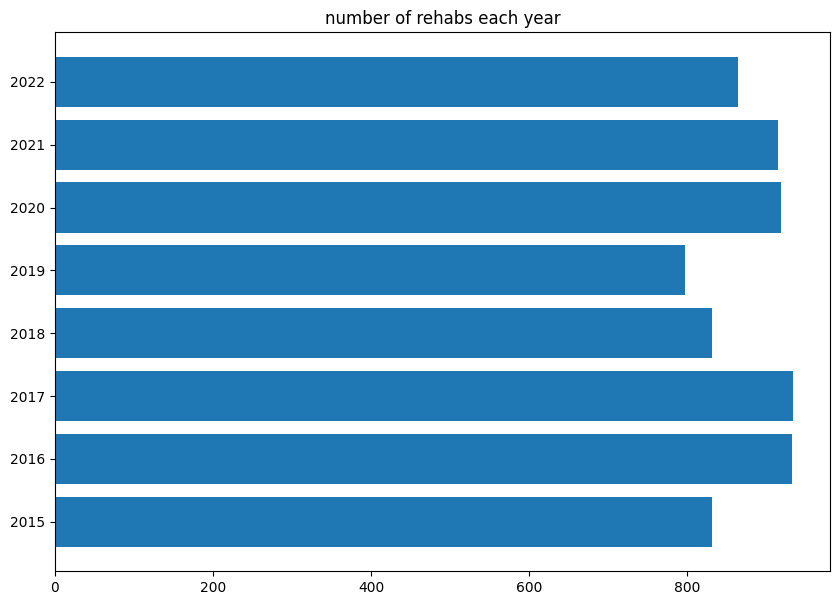

In [181]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(years_ordered)
y = np.array(rehabs_list)
fig = plt.figure(figsize =(10, 7))

plt.title("number of rehabs each year")
plt.barh(x,y)
plt.show()

In [183]:
top_count = {}
for top in df.iloc[:, 4]:
    if (top in top_count):
        top_count[top] += 1
    else:
        top_count[top] = 1
top_count


{'I': 1957,
 'J': 803,
 'G': 367,
 'H': 1491,
 'F': 1226,
 'Subsidized Rental Market': 19,
 'E': 835,
 nan: 19,
 'C': 192,
 'A': 84,
 'B': 502,
 'Rental Market 1': 21,
 'Mixed Market/Subsd Rental': 4,
 'NonResidential': 8,
 'D': 657}

In [200]:
from collections import OrderedDict
top_sorted =  sorted(top_set, key=lambda x: x.lower())
top_sorted

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'Mixed Market/Subsd Rental',
 'NonResidential',
 'Rental Market 1',
 'Subsidized Rental Market']

In [201]:
top_list = []
for i in top_sorted:
    top_list.append(top_count[i])
top_list

[84, 502, 192, 657, 835, 1226, 367, 1491, 1957, 803, 4, 8, 21, 19]

HOusing market topology explained
https://planning.baltimorecity.gov/housing-market-typology/descriptions-housing-market-typology-map

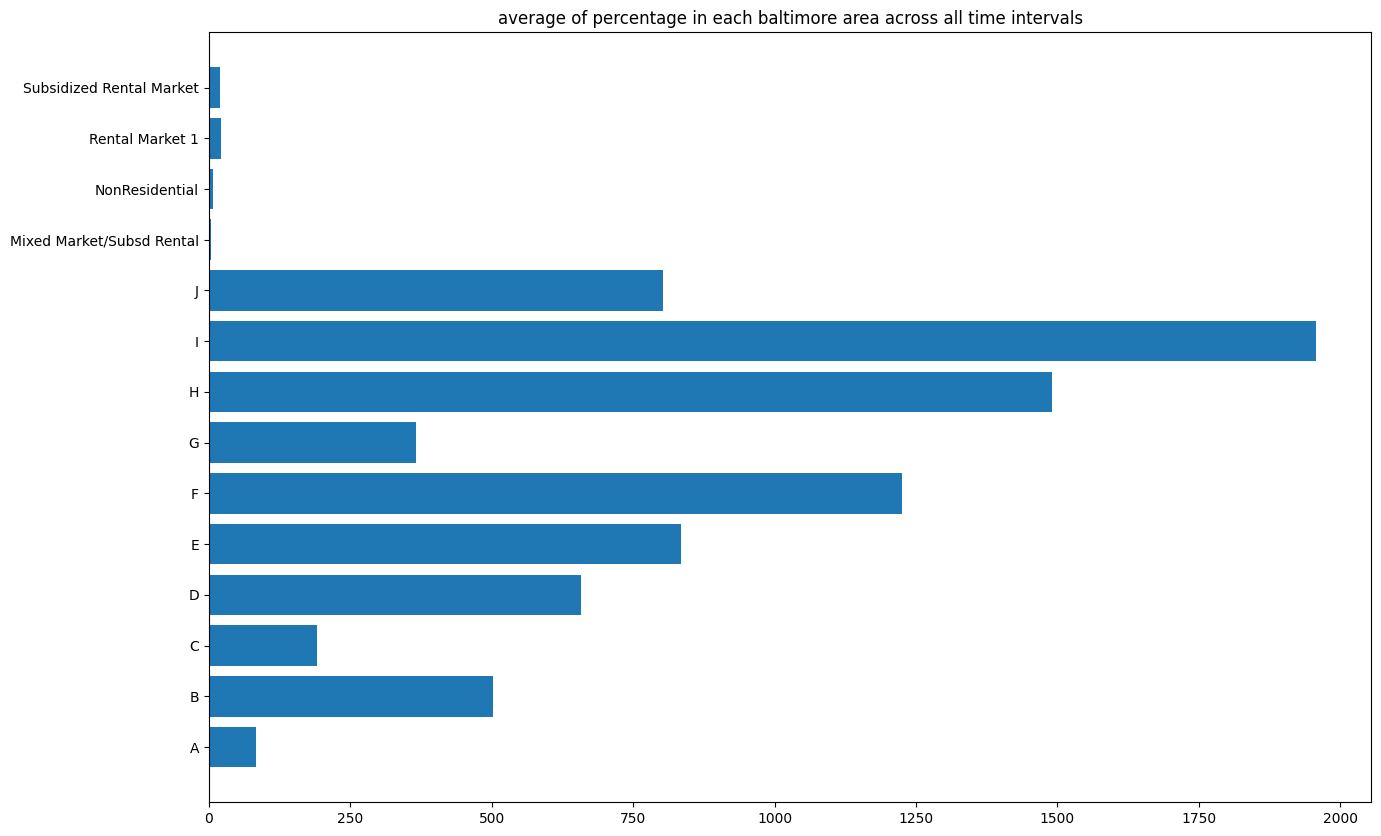

In [202]:
x = np.array(top_sorted)
y = np.array(top_list)
fig = plt.figure(figsize =(15, 10))

plt.title("average of percentage in each baltimore area across all time intervals")
plt.barh(x,y)
plt.show()

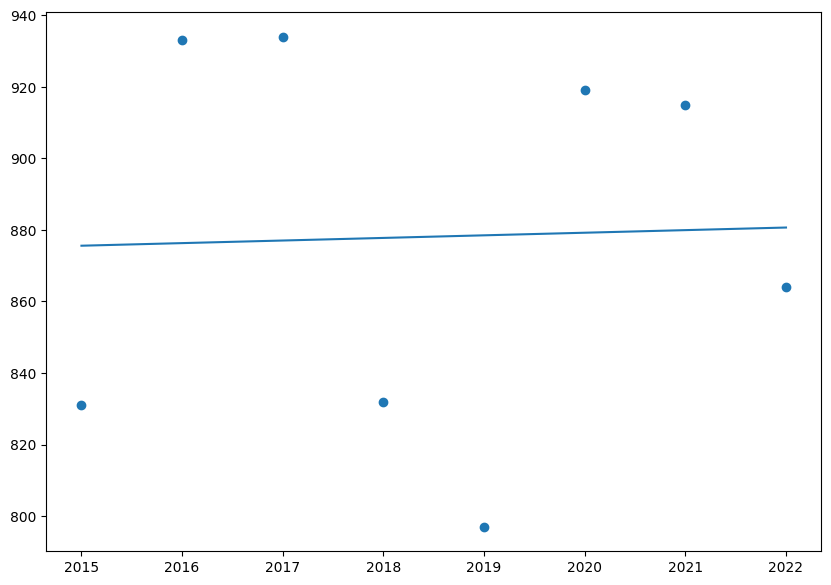

In [203]:
from scipy import stats
x = np.array(years_ordered)
y = np.array(rehabs_list)

slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
  return slope * x + intercept


mymodel = list(map(myfunc, x))

fig = plt.figure(figsize =(10, 7))
plt.scatter(x, y)
plt.plot(x,mymodel)
plt.show()

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x,y

(array([[2015],
        [2016],
        [2017],
        [2018],
        [2019],
        [2020],
        [2021],
        [2022]]),
 array([[ 967],
        [1106],
        [1114],
        [1006],
        [ 963],
        [1046],
        [1037],
        [ 946]]))

In [ ]:
df.values[:,:-1].astype(str)

array([['2018/01/03 13:30:02+00', 'Jan  3 2018  1', '1-08', '1-08', 'I'],
       ['2019/11/13 15:00:29+00', 'Nov 13 2019  3', '1-08', '1-08', 'I'],
       ['2020/06/16 07:30:20+00', 'Jun 16 2020  7', '1-08', '1-08', 'I'],
       ...,
       ['2016/06/15 00:00:00+00', 'Jun 15 2016 12', 'SF', 'SF', 'E'],
       ['2015/01/29 00:00:00+00', 'Jan 29 2015 12', 'VAC', 'SF', 'E'],
       ['2015/04/06 00:00:00+00', 'Apr  6 2015 12', 'VAC', 'FOOD', 'G']],
      dtype='<U25')

In [205]:
df = df.drop(columns=["DateIssue", "DateIssued"])
df

,ExistingUse,ProposedUse,HousingMarketTypology2017,Neighborhood
0,1-08,1-08,I,EASTERWOOD
1,1-08,1-08,I,EASTERWOOD
2,1-08,1-08,I,EASTERWOOD
3,1-08,1-08,I,EASTERWOOD
4,MIXC,MIXC,I,EASTERWOOD
...,...,...,...,...
8180,1-05,1-05,E,WEST FOREST PARK
8181,1-05,1-05,E,WEST FOREST PARK
8182,SF,SF,E,WEST FOREST PARK
8183,VAC,SF,E,WEST FOREST PARK


In [206]:
train = df.iloc[:5621,3]
train_set = set(train.values.flatten())
train

test = df.iloc[5621:, 3]
test_set = set(test.values.flatten())

not_in_train = []
for area in test_set:
    if area not in train_set:
        not_in_train.append(area) 



for area in not_in_train:
    df = df[df.Neighborhood != area]

new_test = []
for area in test:
    if area in not_in_train:
        continue
    else:
        new_test.append(area)
new_test


['COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'COLDSTREAM HOMESTEAD MONTEBELLO          ',
 'CENTRAL PARK HEIGHTS                     ',
 'CENTRAL PARK HEIGHTS                     ',
 'CENTRAL PARK HEIGHTS                     ',
 'CENTRAL PARK HEIGHTS                     ',
 'CENTRAL PARK HEIGHTS                     ',
 'CENTRAL PARK HEIGHTS                     ',
 'CENTRAL PARK HEIGHTS                     ',
 'CENTRAL PARK HEIGHTS            